Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Epoch 1/10
347/625 ━━━━━━━━━━━━━━━━━━━━ 1:51 402ms/step - accuracy: 0.5788 - loss: 0.6998

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 425ms/step - accuracy: 0.6676 - loss: 0.6059 - val_accuracy: 0.7373 - val_loss: 0.5431
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 415ms/step - accuracy: 0.7680 - loss: 0.4821 - val_accuracy: 0.7645 - val_loss: 0.4873
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 417ms/step - accuracy: 0.8224 - loss: 0.3900 - val_accuracy: 0.7577 - val_loss: 0.5101
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.8923 - loss: 0.2542 - val_accuracy: 0.7693 - val_loss: 0.5482
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 258s 413ms/step - accuracy: 0.9500 - loss: 0.1281 - val_accuracy: 0.7763 - val_loss: 0.7324
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.9823 - loss: 0.0539 - val_accuracy: 0.7655 - val_loss: 1.0081
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.7607 - val_loss: 1.1695
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12468s 419ms/step - accuracy: 0.9904 - loss: 0.

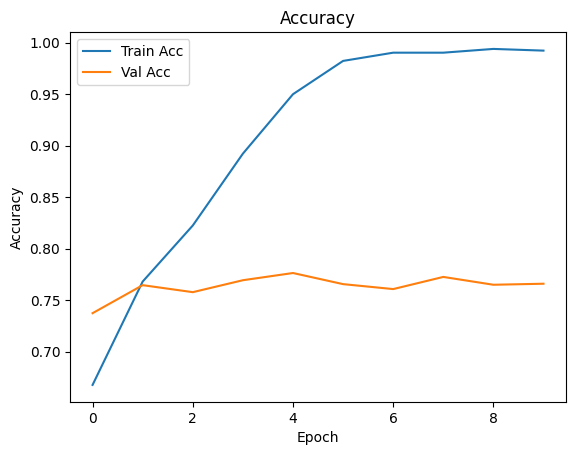

Model saved as 'cat_dog_simple.h5'


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# ------------------- 1. SETTINGS -------------------
DATA_DIR = r'C:\Users\Lenovo\Downloads\PetImages'  # Use raw string to avoid escape issues
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 10

# ------------------- 2. DATA (auto split) ----------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# ------------------- 3. SIMPLE CNN -----------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),   # Fixed: "causing3" → (3,3)
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 0 = cat, 1 = dog
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ------------------- 4. TRAIN ----------------------
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

# ------------------- 5. PLOT -----------------------
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Save model
model.save('cat_dog_simple.h5')
print("Model saved as 'cat_dog_simple.h5'")

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


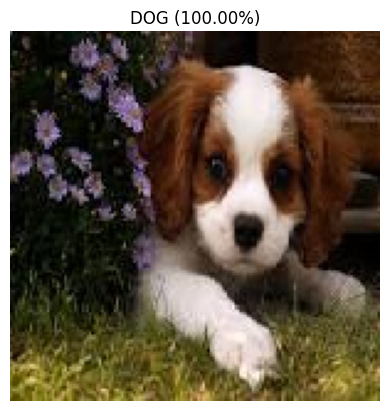

Prediction: DOG (Confidence: 100.00%)


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ------------------- 1. Load the saved model -------------------
model = tf.keras.models.load_model('cat_dog_simple.h5')
print("Model loaded successfully!")

# ------------------- 2. Setting`s (same as training) ------------
IMG_SIZE = 150

# ------------------- 3. Function to predict single image --------
def predict_image(img_path):
    # Load image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale (same as training)

    # Predict
    prediction = model.predict(img_array)
    probability = prediction[0][0]
    
    # Show image
    plt.imshow(img)
    plt.axis('off')
    
    if probability < 0.5:
        label = "CAT"
        confidence = 1 - probability
    else:
        label = "DOG"
        confidence = probability
    
    plt.title(f"{label} ({confidence*100:.2f}%)")
    plt.show()
    
    print(f"Prediction: {label} (Confidence: {confidence*100:.2f}%)")

# ------------------- 4. Use it on any image -------------------
# Replace with your image path
predict_image(r'C:\Users\Lenovo\Downloads\dg.JFIF')  